# ML Assignment 5 - Iris Clustering

In [5]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
# 2. Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\SALMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


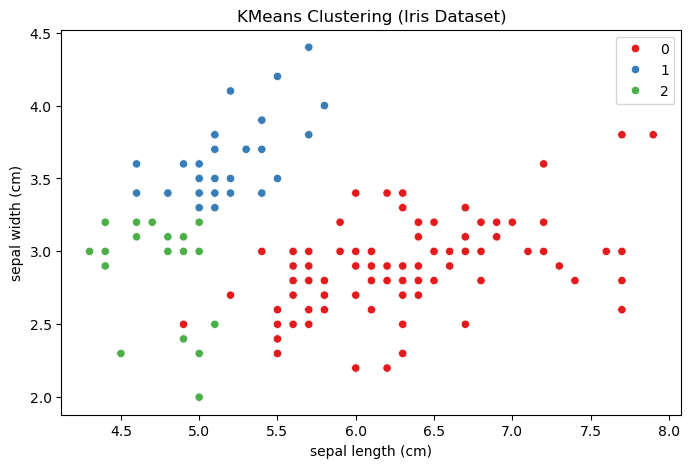

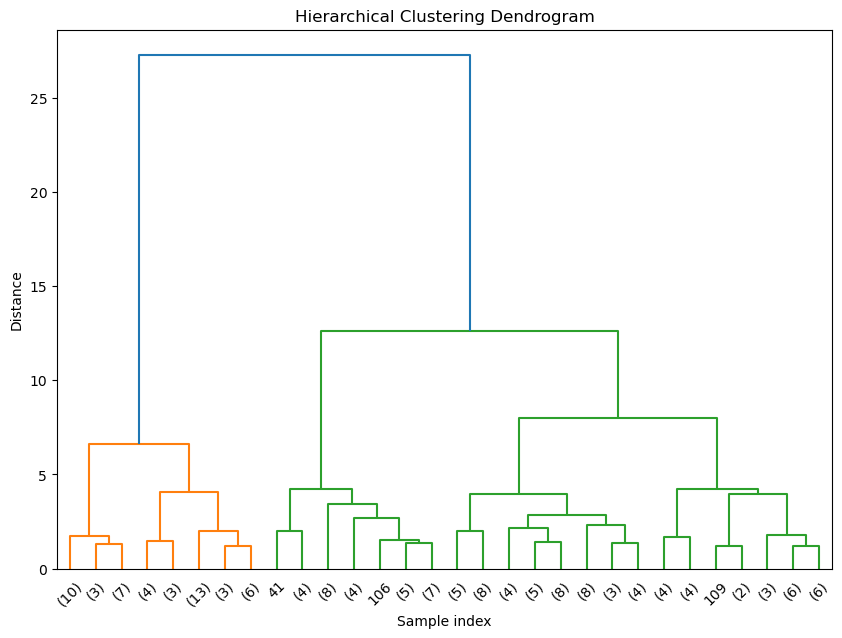

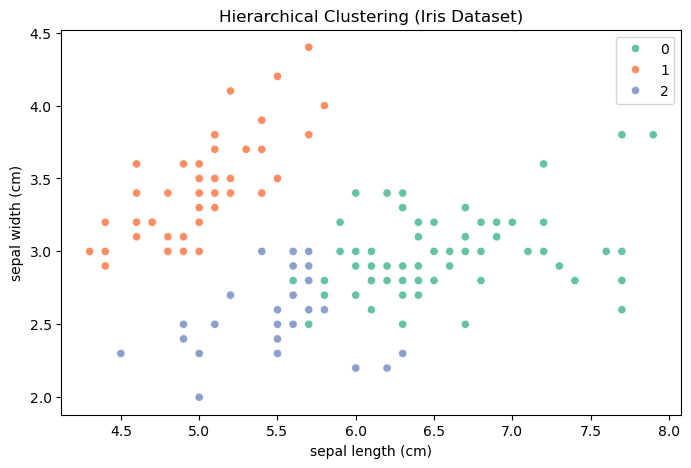

In [13]:
# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ----- KMeans Clustering -----
# KMeans Description:
# KMeans divides the data into K clusters by minimizing the distance between points and their cluster center.
# It's good for well-separated and balanced datasets like Iris.

# Apply KMeans with 3 clusters (since we know Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Visualize KMeans clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("KMeans Clustering (Iris Dataset)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

# ----- Hierarchical Clustering -----
# Hierarchical Clustering Description:
# It builds a tree (dendrogram) by merging or splitting clusters step by step.
# It's good for small datasets and gives a visual representation of cluster hierarchy.

# Create linkage matrix and plot dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add hierarchical cluster labels
df['Hierarchical_Cluster'] = hierarchical_labels

# Visualize Hierarchical Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=hierarchical_labels, palette='Set2')
plt.title("Hierarchical Clustering (Iris Dataset)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()
